Try:
-  `.info()` 
-  `.describe()` 
-  `pd.plotting.scatter_matrix()` 


# Clean data

## Upload data

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [84]:
data = pd.read_csv('kc_house_data.csv')

In [85]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [86]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Drop columns

**Columns to drop:**  
 - date - don't care when house was sold. All in the same 9 months  
 - id - house id not important  
 - view - My goal is to look into qualities of the houses, not the sales process  
 - condition - concept overlaps with 'grade'. Don't want to use both.  
 - lat - I'll use zip coded, but not looking into that specific geography 
 - long - same as above  
 
 I'll probably also drop some square footage stuff after I look into it some based on collinearity  

In [87]:
to_drop = ['id', 'date', 'view', 'condition', 'lat', 'long']

In [88]:
data.drop(to_drop, axis=1, inplace=True)

In [89]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,1180,0.0,1955,0.0,98178,1340,5650


## Check for collinearity of area-based columns

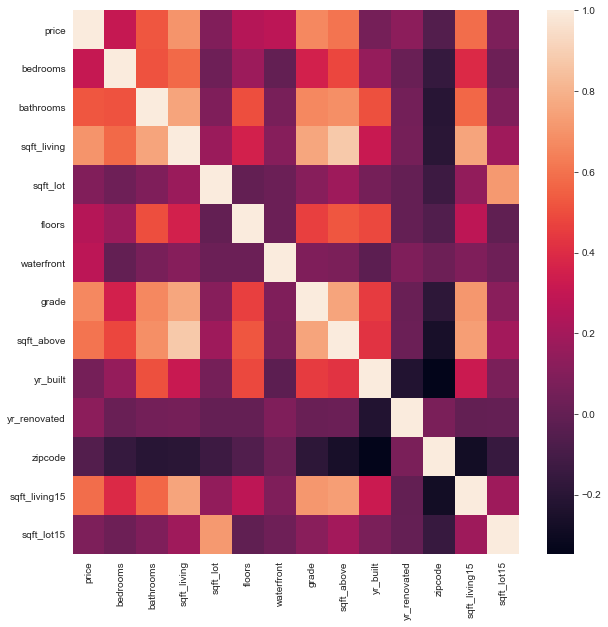

In [90]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr());

In [91]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [92]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

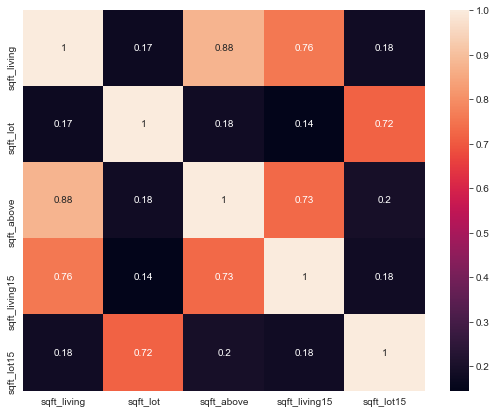

In [93]:
plt.figure(figsize=(9,7))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_living/sqft_above  
- sqft_living/sqft_living15  

I'll take those out of the heatmap and recheck:

In [94]:
area_categs = ['sqft_living', 'sqft_lot', 'sqft_basement', 'sqft_lot15']

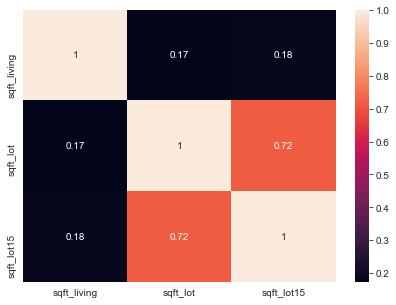

In [95]:
plt.figure(figsize=(7,5))
sns.heatmap(data[area_categs].corr(), annot=True);

**High correlations:**
- sqft_lot/sqft_lot15  

So I'll remove from the dataframe:
- sqft_above  
- sqft_living15  
- sqft_lot15  

## Drop collinear columns

In [96]:
to_drop = ['sqft_above', 'sqft_living15', 'sqft_lot15']
data.drop(to_drop, axis=1, inplace=True)

In [97]:
data.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.0,1180,5650,1.0,NaN,7,0.0,1955,0.0,98178


## Convert datatypes and deal with NaN's

In [98]:
data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
grade              int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
dtype: object

In [99]:
data.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

`data.sqft_basement = data.sqft_basement.astype(float)` doesn't work. Must be some weird characters in it.

In [100]:
data.sqft_basement.tolist()[0:20]

['0.0',
 '400.0',
 '0.0',
 '910.0',
 '0.0',
 '1530.0',
 '?',
 '0.0',
 '730.0',
 '0.0',
 '1700.0',
 '300.0',
 '0.0',
 '0.0',
 '0.0',
 '970.0',
 '0.0',
 '0.0',
 '?',
 '0.0']

I see there are a lot of '?' in it.

In [101]:
data.sqft_basement.tolist().count('?')

454

In [102]:
data.sqft_basement.tolist().count('?')/len(data)

0.021021438162707785

Just about 2% are question marks. I'll just assume these homes have no basement.

In [103]:
data.sqft_basement = data.sqft_basement.replace(to_replace='?', value='0.0')

Now, I'll convert them to floats

In [104]:
data.sqft_basement = data.sqft_basement.astype(float)

Converting bathroom to integer...

I was going to do: `data.bathrooms = data.bathrooms.astype(int)` but I see that there are half bathrooms, etc. so I'll leave that alone.

In [113]:
data.bathrooms.tolist()[0:10]

[1.0, 2.25, 1.0, 3.0, 2.0, 4.5, 2.25, 1.5, 1.0, 2.5]

Converting yr_renovated to integer

`data.yr_renovated = data.yr_renovated.astype(int)` gives me an error. Might be some weird data in there.

In [106]:
data.yr_renovated.tolist()[0:10]

[0.0, 1991.0, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

I see there are some `nan`. Will change to 0.

In [107]:
data.yr_renovated.isna().sum()/len(data)

0.17789507802009538

18% has no data as to whether was renovated. I'm going to convert those to 0, in particular because I plan to only look at "recently renovated" later on, and if something was recently renovated, it should be have a date. 

In [108]:
data.yr_renovated = data.yr_renovated.fillna(0)

In [109]:
data.yr_renovated = data.yr_renovated.astype(int)

In [110]:
data.yr_renovated

0           0
1        1991
2           0
3           0
4           0
         ... 
21592       0
21593       0
21594       0
21595       0
21596       0
Name: yr_renovated, Length: 21597, dtype: int32

Check out waterfront

In [115]:
data.waterfront.isna().sum()/len(data)

0.11001527989998611

11% of waterfront is nan. But I'll convert that to 0, because if something had a waterfront, it would likely be known.

In [116]:
data.waterfront = data.waterfront.fillna(0)

Any more Nan's? Nope...

In [120]:
data.isnull().any()

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
grade            False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
dtype: bool

## Check for outliers

One of the bedrooms is off

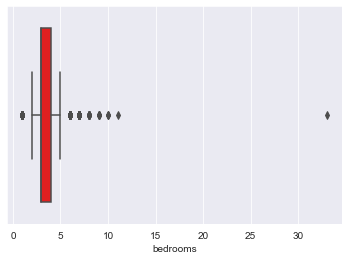

In [126]:
sns.boxplot(x=data['bedrooms'], color='r')

In [127]:
data[data.bedrooms > 20]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
15856,640000.0,33,1.75,1620,6000,1.0,0.0,7,580.0,1947,0,98103


I'll remove this one.

In [128]:
data = data.drop(data.index[15856])

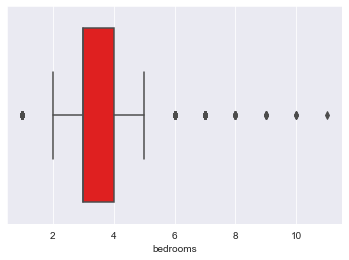

In [130]:
sns.boxplot(x=data['bedrooms'], color='r')

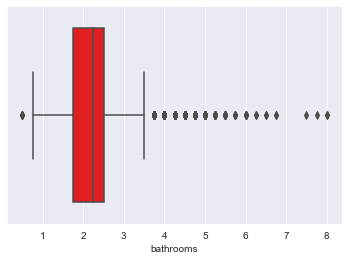

In [131]:
sns.boxplot(x=data['bathrooms'], color='r')

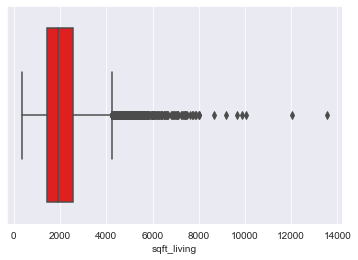

In [132]:
sns.boxplot(x=data['sqft_living'], color='r')

In [133]:
data[data.sqft_living > 11000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode
7245,7700000.0,6,8.0,12050,27600,2.5,0.0,13,3480.0,1910,1987,98102
12764,2280000.0,7,8.0,13540,307752,3.0,0.0,12,4130.0,1999,0,98053


There are some mansions, but I'll keep them.